<a href="https://colab.research.google.com/github/DrGezka/DrGezka/blob/main/Clustering%20with%20K-Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv('dataMeteorites.csv')
data.head()

,ID,Meteorite,Type,Code Type,Class,SiO2,MgO,Fe(t),TiO2,Al2O3,Cr2O3,MnO,CaO,P2O5,Ni,Co
0,221,Weekeroo incl,Mesosiderites and Inclusions from iron meteorites,8,IIE,54.54,16.24,8.64,0.29,5.22,2.76,0.59,5.16,0.10,0.05,0.00
1,220,Netschaevo incl,Mesosiderites and Inclusions from iron meteorites,8,IIE,32.26,19.54,33.89,0.10,1.71,0.48,0.24,1.53,0.43,2.50,0.10
2,219,El Taco3 incl,Mesosiderites and Inclusions from iron meteorites,8,IAB,40.52,31.94,3.68,0.13,1.64,0.30,0.31,2.48,0.03,0.10,0.01
3,218,El Taco2 incl,Mesosiderites and Inclusions from iron meteorites,8,IAB,45.86,28.27,9.27,0.12,3.41,0.33,0.32,1.09,0.26,0.27,0.02
4,217,El Taco1 incl,Mesosiderites and Inclusions from iron meteorites,8,IAB,37.82,28.63,5.03,0.13,1.36,0.10,0.35,1.09,0.39,0.18,0.02


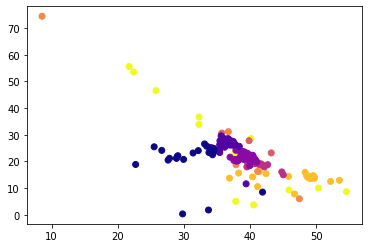

In [ ]:
x_ = data['SiO2']
y_ = data['Fe(t)']
label = data['Code Type']
plt.scatter(x_, y_, c = label, cmap='plasma')

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [ ]:
x = data[['SiO2','Fe(t)']]
y = data['Code Type']
x.head()

,SiO2,Fe(t)
0,54.54,8.64
1,32.26,33.89
2,40.52,3.68
3,45.86,9.27
4,37.82,5.03


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
scaler = StandardScaler()
scaledX = scaler.fit_transform(x)
scaledX[:5]

array([[ 2.94330426, -1.82369575],
       [-1.18447759,  1.63964423],
       [ 0.34584009, -2.50401917],
       [ 1.33517381, -1.7372837 ],
       [-0.15438482, -2.3188505 ]])

In [ ]:
from pandas.core.common import random_state
sse = []
index = range(1, 10)
for i in index:
  kmeans = KMeans(n_clusters=i, random_state=30)
  kmeans.fit(x)
  sse_ = kmeans.inertia_
  sse.append(sse_)
  print(i, sse_)

1 18185.507223529414
2 11533.853389861755
3 6086.945261098901
4 3926.58986337451
5 3007.840037642723
6 2330.443021834546
7 1707.1342551127368
8 1407.4243623890827
9 1169.190105820106


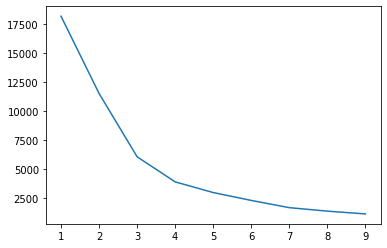

In [ ]:
plt.plot(index, sse)
plt.show()

In [ ]:
from sklearn import metrics
rand = []
index = range(1, 10)
for i in index:
  kmeans = KMeans(n_clusters=i, random_state=30)
  kmeans.fit(x)
  rand_ = metrics.adjusted_rand_score(y, kmeans.labels_)
  rand.append(rand_)
  print(i, rand_)

1 0.0
2 0.016264214420735248
3 0.1746208991452667
4 0.5331920790850503
5 0.5229342281600915
6 0.5660570809633487
7 0.5553134951801936
8 0.6023259951723389
9 0.6211725912212795


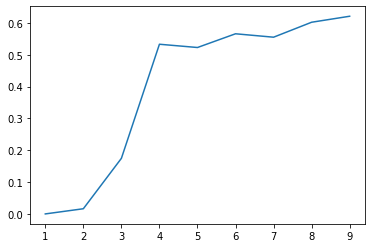

In [ ]:
plt.plot(index, rand)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=9, random_state=30)
kmeans.fit(x)
y_kmeans = kmeans.fit_predict(x)

In [ ]:
kmeans.labels_

array([4, 1, 7, 4, 7, 2, 3, 4, 3, 1, 3, 1, 0, 0, 0, 0, 4, 4, 4, 0, 0, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 0, 2, 2, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 1,
       1, 1, 1, 1, 1, 8, 8, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 8, 0, 8, 1, 8, 1, 8, 8,
       8, 8, 8, 8, 8, 8, 0, 7, 7, 8, 8, 8, 8, 8, 5, 5, 5, 5, 5, 5, 5, 5,
       5], dtype=int32)

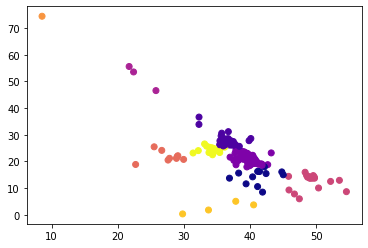

In [ ]:
x_ = data['SiO2']
y_ = data['Fe(t)']
label = kmeans.labels_
plt.scatter(x_, y_, c = label, cmap='plasma')